# Data Modelling

## Automatic parameters

In [1]:
## Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_squared_log_error, median_absolute_error
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc,precision_score,recall_score
from sklearn.model_selection import learning_curve
import seaborn as sns

In [2]:
data = pd.read_csv('clean_data_60_40.csv')
print(data.info())

df=data


X = df.drop(['Output', 'Weighted_Score'], axis=1)
y = df['Output']

print("\nX:")
print(X[:5])
print("\ny:")
print(y[:50])
print('\nX shape :',X.shape)
print('y shape :',y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1003 non-null   int64  
 1   Experience      1003 non-null   float64
 2   Niveau          1003 non-null   float64
 3   Weighted_Score  1003 non-null   float64
 4   Output          1003 non-null   int64  
 5   Domain          1003 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.1 KB
None

X:
   Gender  Experience  Niveau  Domain
0       1        0.24    0.42       6
1       0        0.03    0.25       9
2       1        0.10    0.17       8
3       1        0.24    0.42       2
4       1        0.07    0.42       3

y:
0     1
1     0
2     0
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    0
19    0
20    1
21    0
22    0
23    1
24    1
25    1
26    0
27    1
28    0
29    0
30

#### ANN

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 0.3413 - accuracy: 0.1970 - val_loss: 0.3420 - val_accuracy: 0.2239
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.2556 - val_loss: 0.3156 - val_accuracy: 0.2438
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2920 - accuracy: 0.3155 - val_loss: 0.2905 - val_accuracy: 0.3234
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.3928 - val_loss: 0.2696 - val_accuracy: 0.4129
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2531 - accuracy: 0.4938 - val_loss: 0.2500 - val_accuracy: 0.5075
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2350 - accuracy: 0.5574 - val_loss: 0.2321 - val_accuracy: 0.5373
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.5736 - val_loss: 0.2194 - val_accuracy: 0.5522
Epoch 8/100
2

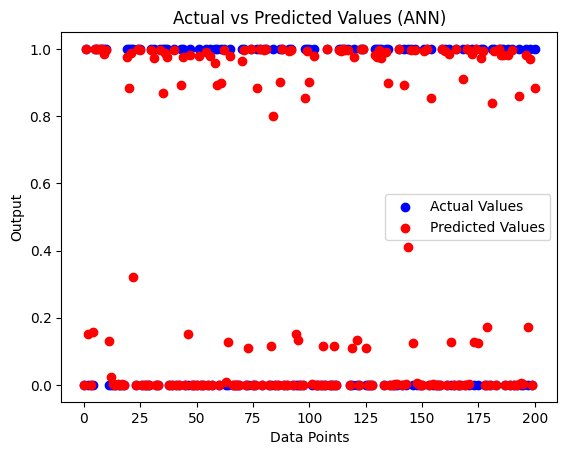

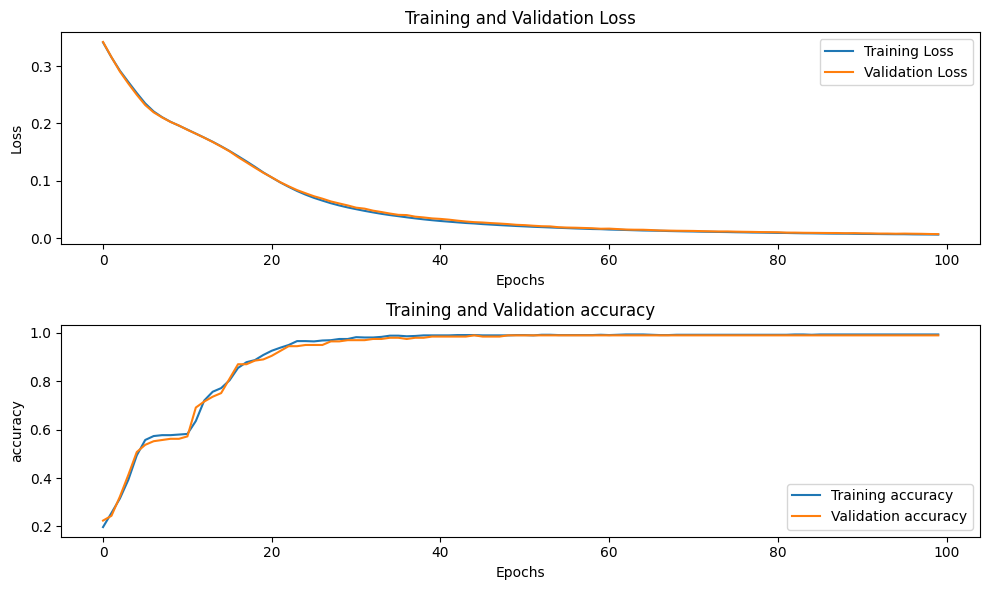

In [3]:
#Feature Scaling
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))

# Adding a second hidden layer
model.add(Dense(units=6, activation='relu'))

# Adding the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the ANN
# Compiling the ANN
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Define Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the ANN on the Training set
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    batch_size=32, epochs=100, verbose=1, callbacks=[early_stopping])

# Making predictions on the Test set
y_pred = model.predict(X_test)

# Display the results

# Visualizing actual vs predicted values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Values')
plt.title('Actual vs Predicted Values (ANN)')
plt.xlabel('Data Points')
plt.ylabel('Output')
plt.legend()
plt.show()

# Plotting the training history
plt.figure(figsize=(10, 6))

# Plotting loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting MAE
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### ML Models

In [4]:
# Define the models

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis(LDA)', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('Decision Tree', DecisionTreeClassifier()))


model_names = []
accuracy_score_train_values = []
accuracy_score_test_values = []
auc_test_values = []
roc_auc_test_values = []
f1_score_test_values = []
precision_test_values = []
recall_test_values = []
confusion_matrix_test_values = []
gini_coefficient_values = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Iterate over the models and display R2 score and MSE
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate performance on training set
    accuracy_score_train=accuracy_score(y_train, y_train_pred, normalize=True)

    # Evaluate the model's performance
    accuracy_score_test=accuracy_score(y_test, y_pred, normalize=True)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc_test=metrics.auc(fpr, tpr)
    
    roc_auc_test = roc_auc_score(y_test, y_pred)
    
    confusion_matrix_test=confusion_matrix(y_test, y_pred)
    
    f1_score_test=f1_score(y_test, y_pred, average=None)
    
    gini_coefficient = 2 * roc_auc_test - 1
    
    precision_test = precision_score(y_test, y_pred, average=None)
    recall_test = recall_score(y_test, y_pred, average=None)

    model_names.append(name)
    accuracy_score_train_values.append(accuracy_score_train)
    accuracy_score_test_values.append(accuracy_score_test)
    auc_test_values.append(auc_test)
    roc_auc_test_values.append(roc_auc_test)
    f1_score_test_values.append(f1_score_test)
    confusion_matrix_test_values.append(confusion_matrix_test)
    gini_coefficient_values.append(gini_coefficient)
    precision_test_values.append(precision_test)
    recall_test_values.append(recall_test)
    
    # Display the results
    print(f'Model: {name}')
    print("\n *** Training Performance:")
    print(f"Accuracy: {accuracy_score_train:.4f}")
    
    print("\n *** Testing Performance:")
    print(f'Accuracy: {accuracy_score_test:.4f}')
    print(f'Auc: {auc_test:.4f}')
    print(f'Roc: {roc_auc_test:.4f}')
    print(f'f1_score: {f1_score_test}')
    print(f'precision_score: {precision_test}')
    print(f'recall_score: {recall_test}')
    print(f'Gini Coefficient: {gini_coefficient:.4f}')
    print(f'\nconfusion_matrix: {confusion_matrix_test}')
    print('-' * 20)
    train_size_abs, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=[0.3, 0.6, 0.9]
    )
    for train_size, cv_train_scores, cv_test_scores in zip(
        train_size_abs, train_scores, test_scores
    ):
        print('\n')
        print(f"{train_size} samples were used to train the model")
        print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
        print(f"The average test accuracy is {cv_test_scores.mean():.2f}")
        
    print('-' * 50)

Model: Logistic Regression

 *** Training Performance:
Accuracy: 0.9401

 *** Testing Performance:
Accuracy: 0.9254
Auc: 0.9176
Roc: 0.9176
f1_score: [0.93617021 0.91017964]
precision_score: [0.88 1.  ]
recall_score: [1.         0.83516484]
Gini Coefficient: 0.8352

confusion_matrix: [[110   0]
 [ 15  76]]
--------------------


240 samples were used to train the model
The average train accuracy is 0.89
The average test accuracy is 0.87


481 samples were used to train the model
The average train accuracy is 0.92
The average test accuracy is 0.93


721 samples were used to train the model
The average train accuracy is 0.94
The average test accuracy is 0.94
--------------------------------------------------
Model: Linear Discriminant Analysis(LDA)

 *** Training Performance:
Accuracy: 0.9327

 *** Testing Performance:
Accuracy: 0.9104
Auc: 0.9011
Roc: 0.9011
f1_score: [0.92436975 0.8902439 ]
precision_score: [0.859375 1.      ]
recall_score: [1.        0.8021978]
Gini Coefficient: 0.802

Model: Logistic Regression


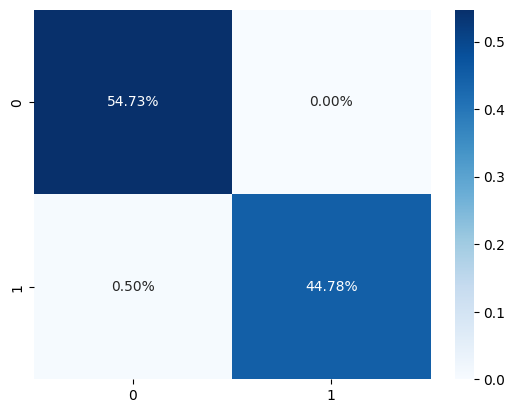

--------------------------------------------------
Model: Linear Discriminant Analysis(LDA)


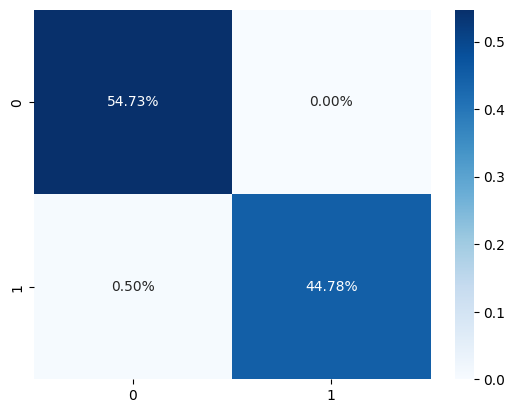

--------------------------------------------------
Model: KNN


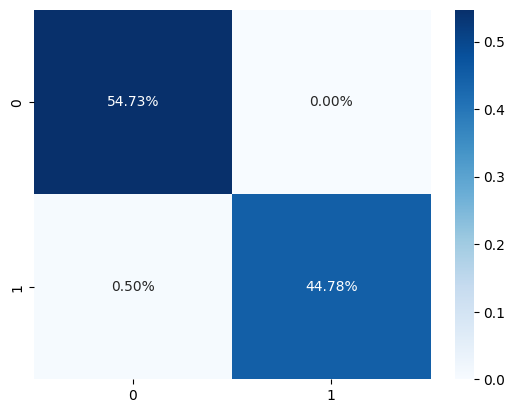

--------------------------------------------------
Model: NB


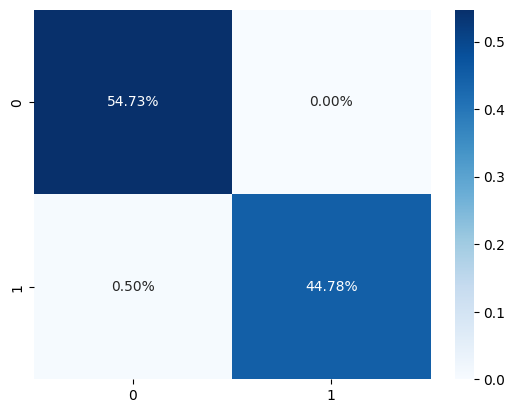

--------------------------------------------------
Model: SVM


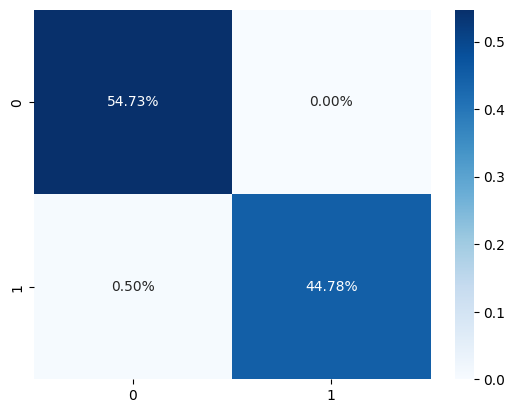

--------------------------------------------------
Model: Decision Tree


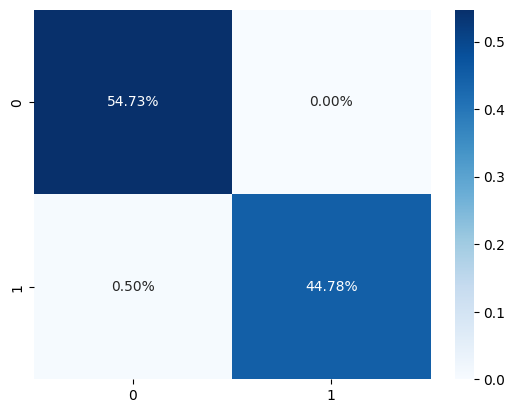

--------------------------------------------------


In [5]:
for name, model in models:
    print(f'Model: {name}')
    sns.heatmap(confusion_matrix_test/np.sum(confusion_matrix_test), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
    print('-' * 50)

In [6]:
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    cv_results_auc = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')

    
    # Display the results
    print(f'\nModel: {name}')
    print(f"Mean Accuracy with cross validation: {cv_results_auc.mean():.4f}")
    


Model: Logistic Regression
Mean Accuracy with cross validation: 0.9452

Model: Linear Discriminant Analysis(LDA)
Mean Accuracy with cross validation: 0.9322

Model: KNN
Mean Accuracy with cross validation: 0.9422

Model: NB
Mean Accuracy with cross validation: 0.9063

Model: SVM
Mean Accuracy with cross validation: 0.7608

Model: Decision Tree
Mean Accuracy with cross validation: 0.9980


## Tuning hyperparamets

In [7]:
## Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [8]:
df=data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

results = {}
# LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Display results
print("Best Hyperparameters LogisticRegression:", best_params)
print("Accuracy on Test Set LogisticRegression:", accuracy)
results['LogisticRegression'] = {'best_params': best_params, 'accuracy': accuracy}

print('\n')
# LDA
param_grid = {
    'shrinkage': ['None', 'auto',0,0.5,0.8,1],
    'solver': ['svd', 'lsqr', 'eigen']
}

model = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Display results
print("Best Hyperparameters LDA:", best_params)
print("Accuracy on Test Set LDA:", accuracy)
print('\n')
results['LinearDiscriminantAnalysis'] = {'best_params': best_params, 'accuracy': accuracy}


#KNN
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3,4]
}

model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(sorted(grid_search.cv_results_.keys()))
# Display results
print("Best Hyperparameters KNN:", best_params)
print("Accuracy on Test Set KNN:", accuracy)
print('\n')
results['KNeighborsClassifier'] = {'best_params': best_params, 'accuracy': accuracy}


#SVM
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [100, 200, 300]
}

model = SVC(probability=True)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(sorted(grid_search.cv_results_.keys()))
# Display results
print("Best Hyperparameters SVM:", best_params)
print("Accuracy on Test Set SVM:", accuracy)
print('\n')
results['SVM'] = {'best_params': best_params, 'accuracy': accuracy}


#Decisiontree
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best' , 'random'],
    'max_depth': [100, 200, 300,'None'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10]
}

model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(sorted(grid_search.cv_results_.keys()))
# Display results
print("Best Hyperparameters Decisiontree:", best_params)
print("Accuracy on Test Set Decisiontree:", accuracy)
results['DecisionTreeClassifier'] = {'best_params': best_params, 'accuracy': accuracy}
print('\n ---------------------------------- \n')
print(results)


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Best Hyperparameters LogisticRegression: {'C': 100, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set LogisticRegression: 1.0




c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py", line 571, in fit
    self._validate_params()
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", li

Best Hyperparameters LDA: {'shrinkage': 0, 'solver': 'lsqr'}
Accuracy on Test Set LDA: 0.9104477611940298


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_algorithm', 'param_n_neighbors', 'param_p', 'param_weights', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
Best Hyperparameters KNN: {'algorithm': 'auto', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}
Accuracy on Test Set KNN: 0.9850746268656716




c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_gamma', 'param_kernel', 'param_max_iter', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
Best Hyperparameters SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 300}
Accuracy on Test Set SVM: 0.9751243781094527


['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_splitter', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
Best Hyperparameters Decisiontree: {'criterion': 'gini', 'max_depth': 100, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy on Test Set Decisiontree: 0.9950248756218906

 ---------------------------------- 

{'LogisticRegression': 

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 177

In [9]:
import pprint
pprint.pprint(results)

{'DecisionTreeClassifier': {'accuracy': 0.9950248756218906,
                            'best_params': {'criterion': 'gini',
                                            'max_depth': 100,
                                            'min_samples_split': 2,
                                            'splitter': 'best'}},
 'KNeighborsClassifier': {'accuracy': 0.9850746268656716,
                          'best_params': {'algorithm': 'auto',
                                          'n_neighbors': 1,
                                          'p': 3,
                                          'weights': 'uniform'}},
 'LinearDiscriminantAnalysis': {'accuracy': 0.9104477611940298,
                                'best_params': {'shrinkage': 0,
                                                'solver': 'lsqr'}},
 'LogisticRegression': {'accuracy': 1.0,
                        'best_params': {'C': 100,
                                        'max_iter': 100,
                                      

## Tuned parameters

In [10]:
df=data

### ML Models

In [11]:
# Define the models

models = []

models.append(('Logistic Regression', LogisticRegression(C=100, max_iter=100, penalty='l1', solver='liblinear')))
models.append(('Linear Discriminant Analysis(LDA)', LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')))
models.append(('KNN', KNeighborsClassifier(algorithm='auto', n_neighbors=1, p=3, weights='uniform')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True, C=10, gamma='scale', kernel='linear', max_iter=300)))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=100, min_samples_split=2, splitter='best')))


model_names = []
accuracy_score_train_values = []
accuracy_score_test_values = []
auc_test_values = []
roc_auc_test_values = []
f1_score_test_values = []
precision_test_values = []
recall_test_values = []
confusion_matrix_test_values = []
gini_coefficient_values = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Iterate over the models and display R2 score and MSE
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    # Evaluate performance on training set
    accuracy_score_train=accuracy_score(y_train, y_train_pred, normalize=True)

    # Evaluate the model's performance
    accuracy_score_test=accuracy_score(y_test, y_pred, normalize=True)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    auc_test=metrics.auc(fpr, tpr)
    
    roc_auc_test = roc_auc_score(y_test, y_pred)
    
    confusion_matrix_test=confusion_matrix(y_test, y_pred)
    
    f1_score_test=f1_score(y_test, y_pred, average=None)
    
    gini_coefficient = 2 * roc_auc_test - 1
    precision_test = precision_score(y_test, y_pred, average=None)
    recall_test = recall_score(y_test, y_pred, average=None)

    model_names.append(name)
    accuracy_score_train_values.append(accuracy_score_train)
    accuracy_score_test_values.append(accuracy_score_test)
    auc_test_values.append(auc_test)
    roc_auc_test_values.append(roc_auc_test)
    f1_score_test_values.append(f1_score_test)
    confusion_matrix_test_values.append(confusion_matrix_test)
    gini_coefficient_values.append(gini_coefficient)
    precision_test_values.append(precision_test)
    recall_test_values.append(recall_test)
    
    # Display the results
    print(f'Model: {name}')
    print("\n *** Training Performance:")
    print(f"Accuracy: {accuracy_score_train:.4f}")
    
    print("\n *** Testing Performance:")
    print(f'Accuracy: {accuracy_score_test:.4f}')
    print(f'Auc: {auc_test:.4f}')
    print(f'Roc: {roc_auc_test:.4f}')
    print(f'f1_score: {f1_score_test}')
    print(f'precision_score: {precision_test}')
    print(f'recall_score: {recall_test}')
    print(f'Gini Coefficient: {gini_coefficient:.4f}')
    print(f'\nconfusion_matrix: {confusion_matrix_test}')
    
    print('-' * 20)
    train_size_abs, train_scores, test_scores = learning_curve(
        model, X, y, train_sizes=[0.3, 0.6, 0.9]
    )
    for train_size, cv_train_scores, cv_test_scores in zip(
        train_size_abs, train_scores, test_scores
    ):
        print('\n')
        print(f"{train_size} samples were used to train the model")
        print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
        print(f"The average test accuracy is {cv_test_scores.mean():.2f}")
        
    print('-' * 50)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model: Logistic Regression

 *** Training Performance:
Accuracy: 0.9975

 *** Testing Performance:
Accuracy: 1.0000
Auc: 1.0000
Roc: 1.0000
f1_score: [1. 1.]
precision_score: [1. 1.]
recall_score: [1. 1.]
Gini Coefficient: 1.0000

confusion_matrix: [[110   0]
 [  0  91]]
--------------------


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Us



240 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00


481 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00


721 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00
--------------------------------------------------
Model: Linear Discriminant Analysis(LDA)

 *** Training Performance:
Accuracy: 0.9327

 *** Testing Performance:
Accuracy: 0.9104
Auc: 0.9011
Roc: 0.9011
f1_score: [0.92436975 0.8902439 ]
precision_score: [0.859375 1.      ]
recall_score: [1.        0.8021978]
Gini Coefficient: 0.8022

confusion_matrix: [[110   0]
 [ 18  73]]
--------------------


240 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.93


481 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.94


721 samples were used to train the mod

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\



240 samples were used to train the model
The average train accuracy is 0.95
The average test accuracy is 0.95


481 samples were used to train the model
The average train accuracy is 0.95
The average test accuracy is 0.94


721 samples were used to train the model
The average train accuracy is 0.87
The average test accuracy is 0.88
--------------------------------------------------
Model: Decision Tree

 *** Training Performance:
Accuracy: 1.0000

 *** Testing Performance:
Accuracy: 0.9950
Auc: 0.9945
Roc: 0.9945
f1_score: [0.99547511 0.99447514]
precision_score: [0.99099099 1.        ]
recall_score: [1.         0.98901099]
Gini Coefficient: 0.9890

confusion_matrix: [[110   0]
 [  1  90]]
--------------------


240 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.98


481 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.99


721 samples were used to train the model
The average

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: Logistic Regression


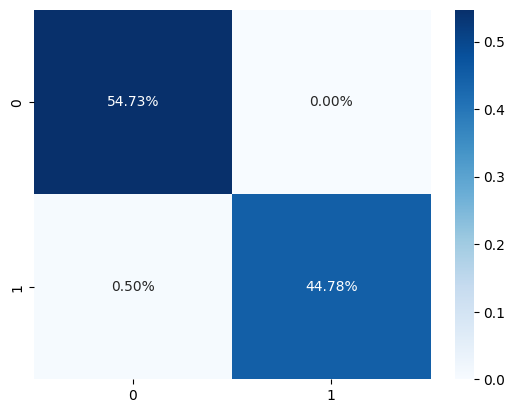

--------------------------------------------------
Model: Linear Discriminant Analysis(LDA)


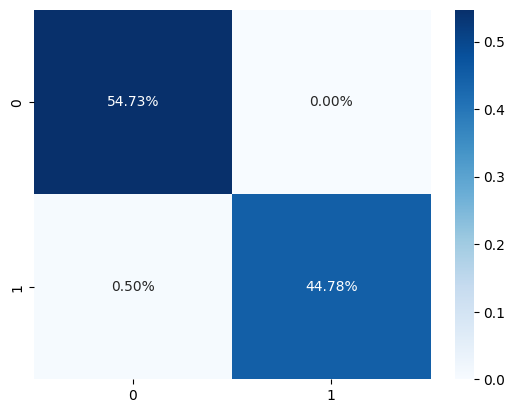

--------------------------------------------------
Model: KNN


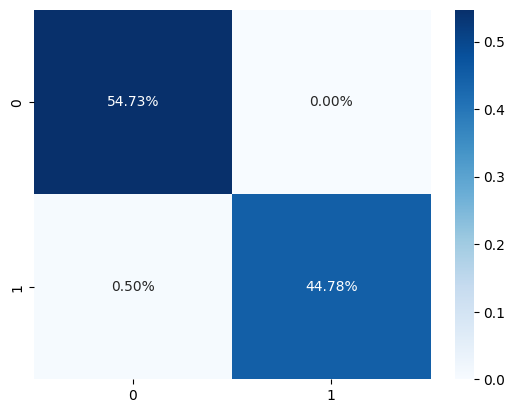

--------------------------------------------------
Model: NB


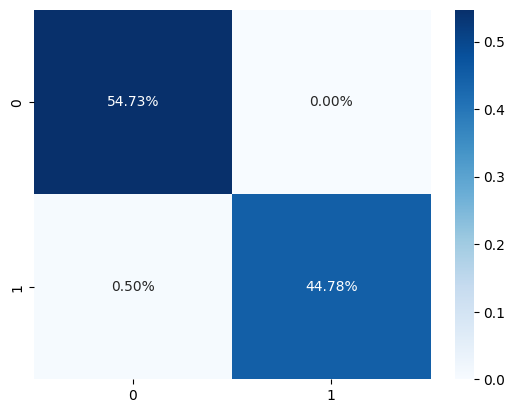

--------------------------------------------------
Model: SVM


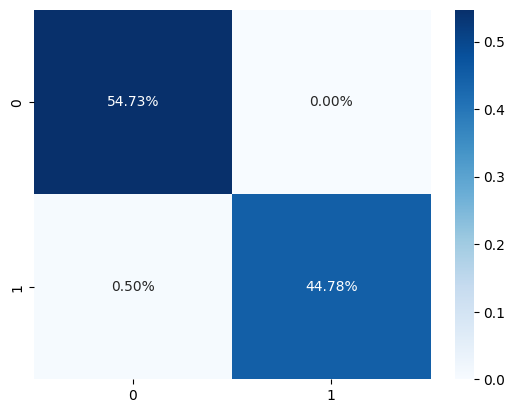

--------------------------------------------------
Model: Decision Tree


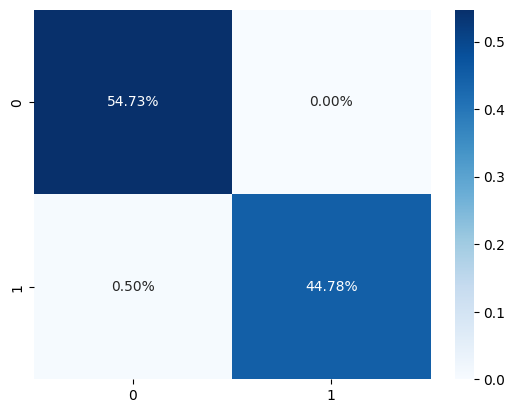

--------------------------------------------------


In [12]:
for name, model in models:
    print(f'Model: {name}')
    sns.heatmap(confusion_matrix_test/np.sum(confusion_matrix_test), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
    print('-' * 50)

In [13]:
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    cv_results_auc = model_selection.cross_val_score(model, X, y, cv=5, scoring='accuracy')

    
    # Display the results
    print(f'\nModel: {name}')
    print(f"Mean Accuracy with cross validation: {cv_results_auc.mean():.4f}")
    

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Model: Logistic Regression
Mean Accuracy with cross validation: 0.9980

Model: Linear Discriminant Analysis(LDA)
Mean Accuracy with cross validation: 0.9322

Model: KNN
Mean Accuracy with cross validation: 0.9790

Model: NB
Mean Accuracy with cross validation: 0.9063

Model: SVM
Mean Accuracy with cross validation: 0.9204

Model: Decision Tree
Mean Accuracy with cross validation: 0.9980


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\PC\AppData\